In [1]:
#!/usr/bin/env python
# coding: utf-8

#specs:
    M/M/1 has infinite buffer while M/M/1/K has only size of K packets
    
    𝐹(𝑥) = 1 − 𝑒^(−𝜆)
    𝒙 = − (𝟏/𝝀) 𝒍𝒏(𝟏 − 𝑼)
    where U is a uniformly generated number and 𝑥 is the exponential random variable

In [2]:
# • λ = Average number of packets generated /arrived (packets per second)
# • L = Average length of a packet in bits.
# • α = Average number of observer events per second
# • C = The transmission rate of the output link in bits per second.
# • ρ = Utilization of the queue (= input rate/service rate = L λ/C)
# • E[N] = Average number of packets in the buffer/queue
# • PIDLE = The proportion of time the server is idle, i.e., no packets in the queue nor a packet is being transmitted.
# • PLOSS = The packet loss probability (for M/M/1/K queue). It is the ratio of the total number of packets lost due to
# buffer full condition to the total number of generated packets.

In [3]:
#simulation Time T
#queue events with
# ----- Packet arrival
# ----- Packet departure
# ----- Observer


In [22]:
from random import seed
from random import random
import numpy as np
import math
import matplotlib.pyplot as plt


seed(358)
L = 2000
mil = C_rate = 1000000
lambda_alpha_factor = 5

In [5]:
#Q1 1000 erv with lamba = 75
# get mean and variance of the 1000 rv

def exp_rad_var(lambda_value):
    return -1 * (math.log(1 - random())) / lambda_value

def mean_variance(data):
    mean = sum(data) / len(data)
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / len(data)
    return mean,variance

def mean_variance_calculator(total_count, lambda_value):
    rad_list = [exp_rad_var(lambda_value) for _ in range(total_count)]
    expected_mean = 1/lambda_value
    expected_variance = expected_mean/lambda_value
    mean,variance = mean_variance(rad_list)
    return mean,variance,expected_mean,expected_variance

In [7]:
exp_rad_var(1/2000)

547.952923144056

## Q1

In [8]:
m,v,em,ev = mean_variance_calculator(1000,75)

In [9]:
print("mean:        ",m , "   variance:        ", v)
print("expect mean: ",em , "   expect variance: ", ev)


mean:         0.013672464877394836    variance:         0.00019539186355121212
expect mean:  0.013333333333333334    expect variance:  0.00017777777777777779


## Q2-3-4 M/M/1 Queue

In [10]:
def infinite_buffer_event_list(Time,lambda_value,L=2000):
    #fix observer rate for all queue
    alpha = lambda_alpha_factor * lambda_value
    #initialization of time stream:
    departureStream = 0 
    arrivalStream = 0
    observerStream = 0
    
    #lists to hold times
    departureStream_list = []
    arrivalStream_list = []
    observerStream_list = []
    
    #get data packets running ...
    while observerStream < Time:
        observerStream = exp_rad_var(alpha) + observerStream
        observerStream_list.append(observerStream)
    while arrivalStream < Time:
        arrivalStream = exp_rad_var(lambda_value) + arrivalStream
        packet_size = exp_rad_var(1/L)
        observerStream = packet_size/C_rate
        
        arrivalStream_list.append(arrivalStream)
        #the first packet arrival T is d
        # If the queue is idle,then the departure time of packet pkti 
        # will be its arrival time plus its transmission time (service time)
        departureStream = arrivalStream + observerStream if(arrivalStream > departureStream) else departureStream + observerStream
        departureStream_list.append(departureStream)
    
    event_list = []
    for d in departureStream_list:
        event_list.append(("Departure", d))
    for a in arrivalStream_list:
        event_list.append(("Arrival", a))
    for o in observerStream_list:
        event_list.append(("Observer", o))
    event_list.sort(key=lambda tup: tup[1], reverse=False)
    return event_list,departureStream_list,arrivalStream_list,observerStream_list

def infinite_buffer_calculation(data):
    a_c = 0 
    d_c = 0
    o_c = 0 
    idle_c = 0
    packet_c = 0
    avg_packet = []
    for key in data:
        if(key[0] == 'Arrival'):
            a_c = a_c + 1
        elif(key[0] == 'Departure'):
            d_c = d_c + 1
        elif(key[0] == 'Observer'):
            o_c = o_c + 1
            packets_in_buffer = a_c - d_c
            if(packets_in_buffer == 0):
                idle_c = idle_c + 1
            else:
                avg_packet.append(packets_in_buffer)
                
    p_idle = idle_c / o_c
    e_n = sum(avg_packet)/len(avg_packet)
    return p_idle, e_n
                
    
    
        

In [11]:
def plot_q3_4():
    plt.title("E[N] - Rho ")
    plt.plot(rho_list, EN)
    plt.xlabel('Rho values')
    plt.ylabel('Average # of packets ')
    plt.show()
    plt.close()


    plt.title("Pidle - Rho")
    plt.xlabel('Rho values')
    plt.ylabel('Percent of idle system')
    plt.plot(rho_list, PIDLE)
    plt.show()
    plt.close()

In [12]:
##### with infinite buffer 
## due to the accuracy of the adding of decimals, we hardcode the sequence
#https://stackoverflow.com/questions/588004/is-floating-point-math-broken
rho_list = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]

def queue_with_infinite_buffer(Time,L=2000,C=C_rate):
    # start processing
    round_index = 0
    total_avg = []
    total_p_idle = []
    for rho in rho_list:
        round_index = round_index + 1 
        # ---------- getting lambda value
        lambda_value = rho / L * C
        print("PROCESS # ", round_index, "   rho: ", rho, "   lambda: ", lambda_value)
        eve,_,_,_ = infinite_buffer_event_list(Time,lambda_value,L)
        pidle,e_n = infinite_buffer_calculation(eve)
        print("P idle: ", pidle, "  E[N]: ", e_n )
        total_avg.append(e_n)
        total_p_idle.append(pidle)
        
    return total_avg,total_p_idle
#         m,v,em,ev = mean_variance_calculator(1000,lambda_value)
#         print("mean:        ",m , "   variance:        ", v)
#         print("expect mean: ",em , "   expect variance: ", ev)
        # ---------- getting departure time value
        
        
        


PROCESS #  1    rho:  0.25    lambda:  125.0
P idle:  0.7484601622899495   E[N]:  1.3352616939939292
PROCESS #  2    rho:  0.35    lambda:  175.0
P idle:  0.6509841163180576   E[N]:  1.5453396462413966
PROCESS #  3    rho:  0.45    lambda:  225.0
P idle:  0.5502846703865608   E[N]:  1.8154244373815034
PROCESS #  4    rho:  0.55    lambda:  275.0
P idle:  0.4474095890650399   E[N]:  2.2356545439688325
PROCESS #  5    rho:  0.65    lambda:  325.0
P idle:  0.35116968978314417   E[N]:  2.846372415964613
PROCESS #  6    rho:  0.75    lambda:  375.0
P idle:  0.25346672414308213   E[N]:  3.940425042306989
PROCESS #  7    rho:  0.85    lambda:  425.0
P idle:  0.15112137525770092   E[N]:  6.67199442479989
PROCESS #  8    rho:  0.95    lambda:  475.0
P idle:  0.0475602572346183   E[N]:  22.00742400580436


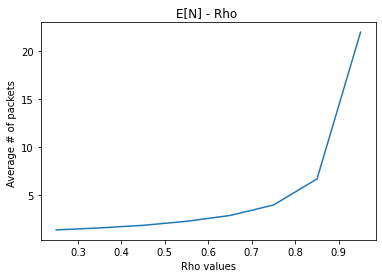

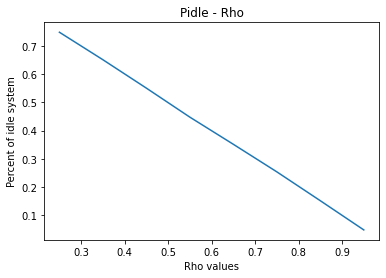

In [13]:
EN,PIDLE = queue_with_infinite_buffer(1000)
plot_q3_4()

PROCESS #  1    rho:  0.25    lambda:  125.0
P idle:  0.7499189195032828   E[N]:  1.331982029581384
PROCESS #  2    rho:  0.35    lambda:  175.0
P idle:  0.6497546813429232   E[N]:  1.540157657620907
PROCESS #  3    rho:  0.45    lambda:  225.0
P idle:  0.5489105298605494   E[N]:  1.8215253504698259
PROCESS #  4    rho:  0.55    lambda:  275.0
P idle:  0.4510501418422961   E[N]:  2.225009484726115
PROCESS #  5    rho:  0.65    lambda:  325.0
P idle:  0.3503839985275927   E[N]:  2.841367282774932
PROCESS #  6    rho:  0.75    lambda:  375.0
P idle:  0.24753748031651499   E[N]:  4.089514268687448
PROCESS #  7    rho:  0.85    lambda:  425.0
P idle:  0.14900740475815125   E[N]:  6.74522139424054
PROCESS #  8    rho:  0.95    lambda:  475.0
P idle:  0.05013171559536649   E[N]:  20.165992188180496


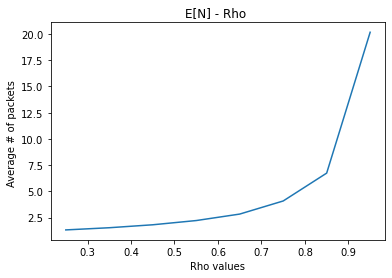

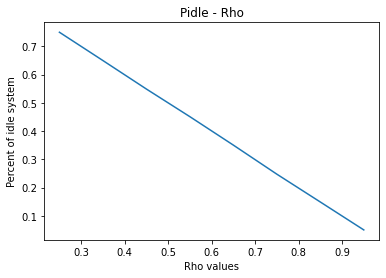

In [14]:
EN,PIDLE = queue_with_infinite_buffer(2000)
plot_q3_4()

## Q4

In [15]:
rho_list = [1.2]
EN,PIDLE = queue_with_infinite_buffer(1000)
# EN,PIDLE = queue_with_infinite_buffer(2000)
# EN,PIDLE = queue_with_infinite_buffer(3000)

PROCESS #  1    rho:  1.2    lambda:  600.0
P idle:  3.6329022289355e-05   E[N]:  49285.856007522045


## Q5 M/M/1/K queue

In [29]:
def finite_buffer_event_list(Time,lambda_value,L=2000):
    #fix observer rate for all queue
    alpha = lambda_alpha_factor * lambda_value
    #initialization of time stream:
    
    #departureStream = 0 
    arrivalStream = 0
    observerStream = 0
    
#     #lists to hold times
#     departureStream_list = []
#     arrivalStream_list = []
#     observerStream_list = []
    
    event_list = []
    #get data packets running ...
    while observerStream < Time:
        observerStream = exp_rad_var(alpha) + observerStream
        #event_list.append(("Observer",observerStream,0))
        heapq.heappush(event_array, (observerStream, 'Observer'))
        
    while arrivalStream < Time:
        arrivalStream = exp_rad_var(lambda_value) + arrivalStream
        packet_size = exp_rad_var(1/L)
        observerStream = packet_size/C_rate
        #event_list.append(("Arrival",arrivalStream,packet_size))
        heapq.heappush(event_array, (arrivalStream, 'Arrival'))

    event_list.sort(key=lambda tup: tup[1], reverse=True)
    return event_list

def finite_buffer_calculation(event_list,K):
    a_c = 0 
    d_c = 0
    o_c = 0 
    
    idle_c = 0
    loss_c = 0
    packet_c = 0
    avg_packet = []

    number_in_queue = 0
    
    packet_size = 0
    service_time = 0
    
    departureStream_list = []
    departureStream = 0 
    
    index = 0    
    while event_list:
        event = heapq.heappop(event_array)
        if(event[0] == 'Arrival'):
            #print("arrival")
            packet_size = event[1]
            service_time = packet_size/C_rate
            #check queue full or empty
            if(number_in_queue < K): #? = or not 
                a_c = a_c + 1
                number_in_queue = number_in_queue + 1
                
                if(departureStream < event_list[index][1]):
                    departureStream = service_time + event_list[index][1]
                else:
                    departureStream = departureStream + service_time
                    
                event_list.insert(0, ("Departure",departureStream,packet_size))
                #event_list.append(("Departure",departureStream,packet_size))
            #full queue drop!
            else:
                loss_c = loss_c + 1
   
        elif(event_list[index][0] == 'Departure'):
            #print("departure")
            number_in_queue = number_in_queue - 1
            d_c = d_c + 1
            
        elif(event_list[index][0] == 'Observer'):
            #print("observer")
            o_c = o_c + 1
#             if((a_c - d_c) == 0):
#                 idle_c = idle_c + 1
            avg_packet.append(a_c - d_c)
        #print(len(event_list))
        event_list.pop(0)
        
            
    p_loss = loss_c/(loss_c + a_c)
    e_n = sum(avg_packet)/len(avg_packet)
    return p_loss, e_n
        

In [18]:
rho = rho_list_second[2]
L = 2000
C = mil
lambda_value = rho / L * C
evee  = finite_buffer_event_list(1000,lambda_value)
op,po = finite_buffer_calculation(evee,50)

NameError: name 'rho_list_second' is not defined

In [ ]:
op,po

In [16]:
rho_list_second = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
packet_list = [10, 25, 50]
def queue_with_finite_buffer(Time,L=2000,C=C_rate):
    # start processing
    round_index = 0
    total_avg = []
    total_p_loss = []
    for K in packet_list:
        for rho in rho_list_second:
            round_index = round_index + 1 
            # ---------- getting lambda value
            lambda_value = rho / L * C
            print("PROCESS # ", round_index, "   rho: ", rho, "   lambda: ", lambda_value, "  K:", K)
            eve = finite_buffer_event_list(Time,lambda_value,L)
            print("长度: " , len(eve))
            ploss,e_n = finite_buffer_calculation(eve,K)
            print("P loss: ", ploss, "  E[N]: ", e_n )
            total_avg.append(e_n)
            total_p_loss.append(ploss)
        
    return total_avg,total_p_loss

In [17]:
tv, tloss = queue_with_finite_buffer(100)

PROCESS #  1    rho:  0.5    lambda:  250.0   K: 10
长度:  149941
P loss:  0.9996007984031936   E[N]:  0.0
PROCESS #  2    rho:  0.6    lambda:  300.0   K: 10
长度:  180655
P loss:  0.9996687644915535   E[N]:  0.0
PROCESS #  3    rho:  0.7    lambda:  350.0   K: 10
长度:  210161
P loss:  0.9997144570400617   E[N]:  0.0
PROCESS #  4    rho:  0.8    lambda:  400.0   K: 10
长度:  240495
P loss:  0.9997500812236023   E[N]:  0.0
PROCESS #  5    rho:  0.9    lambda:  450.0   K: 10
长度:  270130
P loss:  0.9997783147487198   E[N]:  0.0
PROCESS #  6    rho:  1.0    lambda:  500.0   K: 10
长度:  300934
P loss:  0.9998017249925647   E[N]:  0.0
PROCESS #  7    rho:  1.1    lambda:  550.0   K: 10
长度:  330388
P loss:  0.9998184590806768   E[N]:  0.0
PROCESS #  8    rho:  1.2    lambda:  600.0   K: 10
长度:  359636
P loss:  0.9998332555192423   E[N]:  0.0
PROCESS #  9    rho:  1.3    lambda:  650.0   K: 10
长度:  389009
P loss:  0.999844667432974   E[N]:  0.0
PROCESS #  10    rho:  1.4    lambda:  700.0   K: 10
长度:

KeyboardInterrupt: 

In [ ]:
def main():
    rho_list_second = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]
    packet_list = [10, 25, 50]
    queue_with_finite_buffer(100)

In [ ]:

if __name__ == '__main__':
    main()